# Part II - Données du système Ford GoBike
### Par Darnel KOUA

## Aperçu de l’enquête


Dans le cadre de ce projet, on voulais examiner les caractéristiques du système de partage de vélos, examiner la durée des voyages, la période où s'effectue ses voyages, les stations les plus populaires.


## Aperçu de l’ensemble de données

Les données comportaient 183412 observations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco. Il y'avait comme variables la durée en seconde du voyage, le sexe des membres, l'année de naissance, le type d'utilisateur et bien d'autres variables. En raison des valeurs manquantes et des données incohérentes, 14241 observations ont été rétirées.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_ford_GoBike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df_Gobike_clean = df_ford_GoBike.copy()

In [4]:
#convertir en type date les colonnes start_time et end_time
df_Gobike_clean['start_time'] = pd.to_datetime(df_Gobike_clean['start_time'])
df_Gobike_clean['end_time'] = pd.to_datetime(df_Gobike_clean['end_time'])

In [5]:
#Renommer les modalités de variables categorielles
df_Gobike_clean['user_type'] = df_Gobike_clean['user_type'].map({'Subscriber': 'Abonnee', 'Customer':'Client'})
df_Gobike_clean['member_gender'] = df_Gobike_clean['member_gender'].map({'Male': 'Homme', 'Female':'Femme', 'Other' : 'Autres'})
df_Gobike_clean['bike_share_for_all_trip'] = df_Gobike_clean['bike_share_for_all_trip'].map({'No': 'Non', 'Yes':'Oui'})

In [6]:
# Convertir les colonnes user_type et member_gender en des variables catégorielles
dict_var_ordinal = {'user_type' : ['Abonnee', 'Client'],
                    'member_gender' : ['Homme', 'Femme', 'Autres'],
                   'bike_share_for_all_trip' : ['Non', 'Oui']}

for var in dict_var_ordinal:
    var_ordonne = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dict_var_ordinal[var])
    df_Gobike_clean[var] = df_Gobike_clean[var].astype(var_ordonne)

In [7]:
# La proportion des valeurs manquantes étant faible nous allons opter pour la supression des valeurs manquantes
df_Gobike_clean.dropna(inplace=True)
df_Gobike_clean.reset_index(inplace=True, drop= True) #Pour actualiser l'indexation

In [8]:
df_Gobike_clean.rename(columns = {'duration_sec': 'duree_sec', 'start_time' : 'heure_depart', 'end_time' : 'heure_arrivee' , 
                     'start_station_id' : 'code_station_depart', 'start_station_name' : 'Nom_station_depart', 
                     'start_station_latitude' : 'latitude_station_depart', 'start_station_longitude' : 'longitude_station_depart',
                     'end_station_id' : 'code_station_arrivee', 'end_station_name' : 'nom_station_arrivee',
                     'end_station_latitude' : 'latitude_station_arrivee', 'end_station_longitude' : 'longitude_station_arrivee', 
                     'bike_id': 'id_velo', 'user_type' : 'type_utilisateur', 'member_birth_year' : 'annee_nais_membre',
                     'member_gender' : 'sexe_membre', 'bike_share_for_all_trip' : 'partage_velo_tout_voyage'}, inplace= True)

In [9]:
#Calcul du 1er et 3e quartile
Q1=df_Gobike_clean['annee_nais_membre'].quantile(0.25)
Q3=df_Gobike_clean['annee_nais_membre'].quantile(0.75)

#Calcul de l'intervalle interQuartile
IQR=Q3-Q1

# Déterminer la limite superieur et la limite inf
sup=Q3+1.5*IQR
inf=Q1-1.5*IQR

In [10]:
#Base de données sans valeurs abérrantes
#Dans notre étude nous décidons d'écarter les valeurs abérrantes sur les années de naissances
df_Gobike_clean=df_Gobike_clean[(df_Gobike_clean['annee_nais_membre'] >= inf) & (df_Gobike_clean['annee_nais_membre'] <= sup)]

In [11]:
# Ajout des variables heure, Jour et moi
df_Gobike_clean['heure_dp'] = df_Gobike_clean['heure_depart'].dt.hour
df_Gobike_clean['jour_dp'] = df_Gobike_clean['heure_depart'].dt.day

## Distribution de la durée des vayages 

Dans l'ensemble la distribution de la durée des voyages est étalée vers la droite c'est-àdire les petits temps de trajet sont fréquent plus que les longs temps de trajet. Le temps moyen d'un trajet est d'environ 703 secondes soit 12 minutes environ.

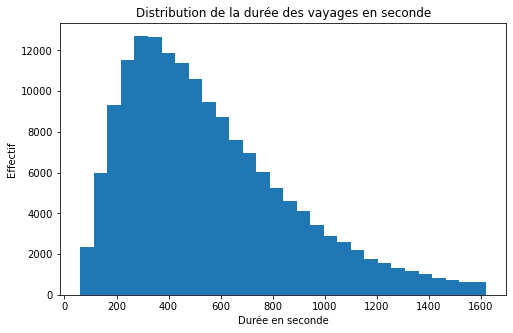

In [12]:
# start with a standard-scaled plot
binsize = 52
bins = np.arange(df_Gobike_clean['duree_sec'].min(), (df_Gobike_clean['duree_sec'].max() - df_Gobike_clean['duree_sec'].min())/binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_Gobike_clean, x = 'duree_sec', bins = bins)
plt.xlabel('Durée en seconde')
plt.ylabel('Effectif')
plt.title('Distribution de la durée des vayages en seconde')
plt.show()

## Distribution de l'année de naissance

Pour ce qui est de l'âge on constate une asymétrie droite, c'est-à-dire les individus moins âgés dans notre population sont plus fréquent à voyager en vélo que les individus plus agés.

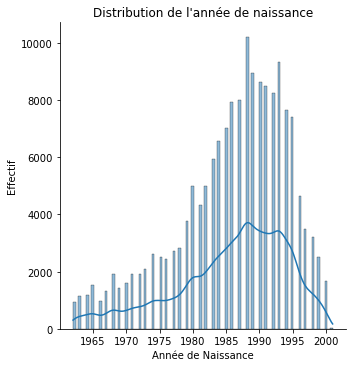

In [13]:
#Visualisation
sb.displot(df_Gobike_clean['annee_nais_membre'], kde = True);
plt.xlabel('Année de Naissance')
plt.ylabel('Effectif')
plt.title("Distribution de l'année de naissance");

## Repartion par heure et par mois des departs de vélos
Nos observations concernent uniquement le mois de février 2019, et pendant ce mois, on observe une augmentation progressive du nombre de voyage pendant les jours ordinaires et une baisse les week-ends. Les heures préférées des voyageurs sont pour la plupart le matin à 8h et le soir vers 17h, 18h.


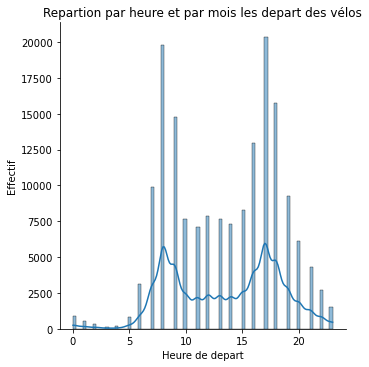

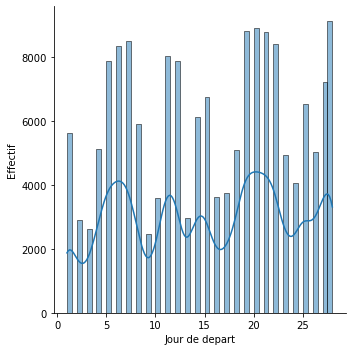

In [14]:
#Visualisation
sb.displot(df_Gobike_clean['heure_dp'], kde = True);
plt.title('Repartion par heure et par mois les depart des vélos')
plt.xlabel("Heure de depart")
plt.ylabel('Effectif')
sb.displot(df_Gobike_clean['jour_dp'], kde = True);
plt.xlabel("Jour de depart")
plt.ylabel('Effectif');

## Les stations les plus populaire
Pour des soucis de visibiliter nous avons choisi de ne représenter que les 20 premières stations de depart et d'arrivée et il apparait que les stations les plus populaires sont: San Franscisco Caltrain, Market St at 10th St, Montgomery, Powell St BART Station que ça soit pour les satitions depart ou l'arrivée.

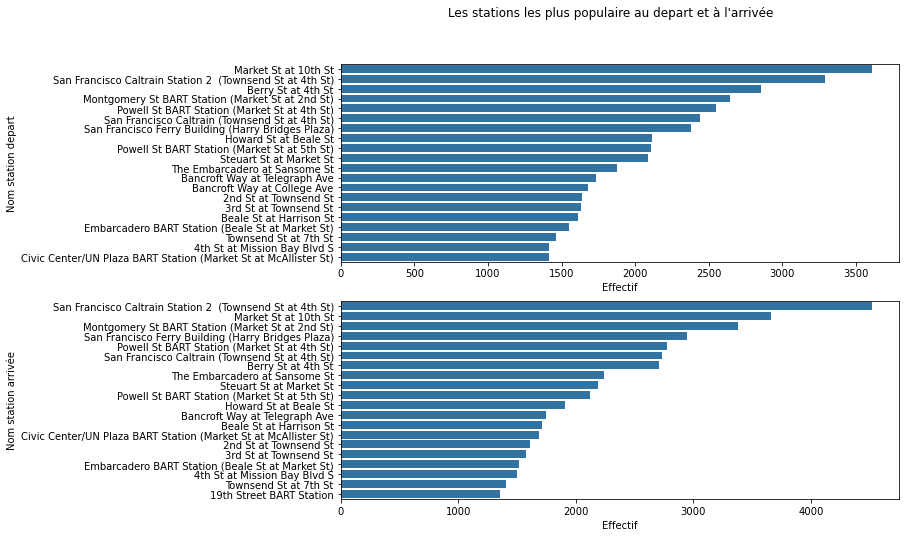

In [15]:
#plt.figure(figsize = [8, 10])
fig, ax = plt.subplots(ncols = 1, nrows = 2 , figsize = [10,8])


type_order1 = df_Gobike_clean['Nom_station_depart'].value_counts()[:20].index 
sb.countplot(data=df_Gobike_clean, y='Nom_station_depart', color=sb.color_palette()[0], order=type_order1, ax=ax[0]);
ax[0].set_xlabel('Effectif')
ax[0].set_ylabel('Nom station depart')

type_order2 = df_Gobike_clean['nom_station_arrivee'].value_counts()[:20].index 
sb.countplot(data=df_Gobike_clean, y='nom_station_arrivee', color=sb.color_palette()[0], order=type_order2, ax=ax[1]);
ax[1].set_xlabel('Effectif')
ax[1].set_ylabel('Nom station arrivée')

fig.suptitle("Les stations les plus populaire au depart et à l'arrivée")
plt.show()

## Distribution  de la log_durée de voyage et année de naissance par partage de vélo

Les gens qui ont partagé le vélo sont un peu plus jeune que les gens qui n'ont pas fait le partage de vélo, on peut donc penser que l'âge diminue avec le fait de partager le vélo pour un voyage. On dira qu'il y'a une dependance entre les variables année de naissance et partage de vélo. Par contre il n'y a pas de liaison entre la variable partage de vélo et durée du voyage.


In [16]:
# calculer le logarithme de la durée
def log_trans(x, inverse = False):
    """ Fonction rapide pour faire des opérations sur le logarithme et la puissance """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_Gobike_clean['log_dure'] = df_Gobike_clean['duree_sec'].apply(log_trans)

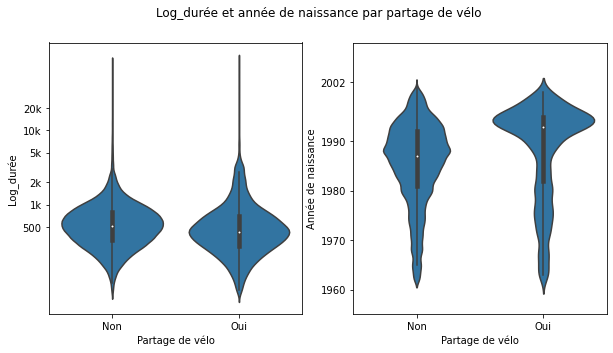

In [17]:
# Visualisation avec la trorformation log de la variable durée en seconde
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [10,5])


sb.violinplot(data = df_Gobike_clean, x = 'partage_velo_tout_voyage', y = 'log_dure', ax = ax[0],
               color = sb.color_palette()[0])
ax[0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
ax[0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
ax[0].set_xlabel('Partage de vélo')
ax[0].set_ylabel('Log_durée')
sb.violinplot(data = df_Gobike_clean, x = 'partage_velo_tout_voyage', y = 'annee_nais_membre', ax = ax[1],
               color = sb.color_palette()[0])
ax[1].set_yticks([1960, 1970, 1980, 1990, 2002])
ax[1].set_yticklabels([1960, 1970, 1980, 1990, 2002])
ax[1].set_ylim(np.array([1955, 2010]))
ax[1].set_xlabel('Partage de vélo')
ax[1].set_ylabel('Année de naissance')
fig.suptitle('Log_durée et année de naissance par partage de vélo')
plt.show()

In [18]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 806896 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\hp\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", li